## <center>Logistic Regression</center>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data

An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. Is it possible to build a model that would predict someone's liklihood to hear the high frequency sound based solely on their features (age and physical score)?

* Features

    * age - Age of participant in years
    * physical_score - Score achieved during physical exam

* Label/Target

    * test_result - 0 if no pass, 1 if test passed

In [2]:
df = pd.read_csv("C:/Users/Lenovo/Desktop/Python/Machine Learning/Supervised Learning/Logistic regression/Data Sets/hearing_test.csv")
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


#### Exploratory Data Analysis and Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [5]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='age'>

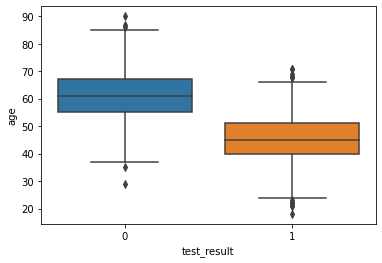

In [6]:
sns.boxplot(x='test_result',y='age',data=df)

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

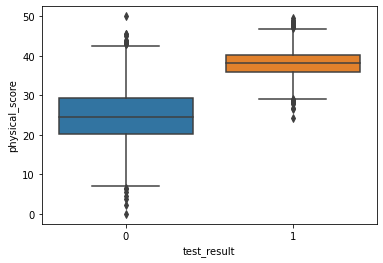

In [7]:
sns.boxplot(x='test_result', y='physical_score',data=df)

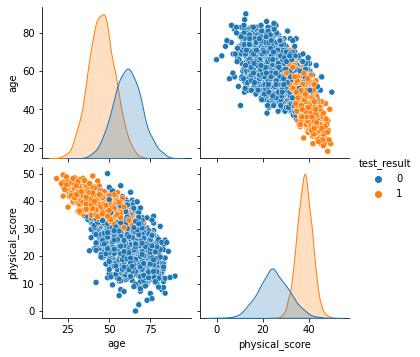

In [8]:
sns.pairplot(df,hue='test_result')

<AxesSubplot:>

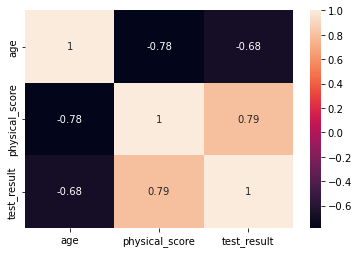

In [9]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

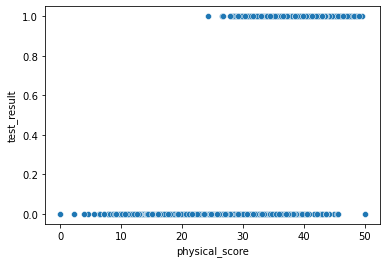

In [10]:
sns.scatterplot(x='physical_score', y='test_result', data=df)

<AxesSubplot:xlabel='age', ylabel='test_result'>

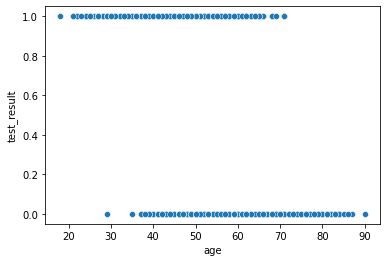

In [11]:
sns.scatterplot(x='age',y='test_result',data=df)

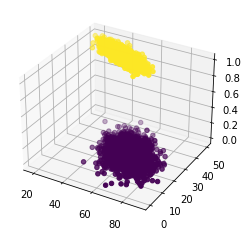

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

### Train, Test, Split and Scaling

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
X = df.drop('test_result',axis=1)
y = df['test_result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [15]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Logistic Regression Model

Some regression algorithms can be used for classification as well. Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class. If the estimated probability is
greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result:

$$\hat{y} = \sigma(\sum_{i=0}^{n}\beta_ix_i) = \frac{1}{1+e^{-\sum_{i=0}^{n}\beta_ix_i}}$$

This could be also be represented in terms of the log odds:

$$ ln(\frac{\hat{y}}{1-\hat{y}}) = \sum_{i=0}^{n}\beta_ix_i $$

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
log_model = LogisticRegression()
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

### Coefficient Interpretation

Things to remember:

* These coeffecients relate to the *odds* and can not be directly interpreted as in linear regression.
* We trained on a *scaled* version of the data 
* It is much easier to understand and interpret the relationship between the coefficients than it is to interpret the coefficients relationship with the probability of the target/label class.

Make sure to watch the video explanation, also check out the links below:

* https://stats.idre.ucla.edu/stata/faq/how-do-i-interpret-odds-ratios-in-logistic-regression/
* https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

### The odds ratio

For a continuous independent variable the odds ratio can be defined as:

$$ OR = \frac{odds(x+1)}{odds(x)} = \frac{\frac{F(x+1)}{1-F(x+1)}}{\frac{F(x)}{1-F(x)}} = \frac{e^{\beta_0 + \beta_1(x+1)}}{e^{\beta_0 + \beta_1x}} = e^{\beta_1}$$

This exponential relationship provides an interpretation for $$\beta _{1}$$ 

The odds multiply by $${e^{\beta _{1}}}$$ for every 1-unit increase in x.

In [18]:
log_model.coef_, log_model.intercept_


(array([[-0.94953524,  3.45991194]]), array([0.48867341]))

This means:
* We can expect the **odds** of passing the test to **decrease** (the original coeff was negative) per unit increase of the age.
* We can expect the **odds** of passing the test to **increase** (the original coeff was positive) per unit increase of the physical score.
* Based on the ratios with each other, the physical_score indicator is a stronger predictor than age.

### Predictions

In [19]:
y_pred = log_model.predict(scaled_X_test)

In [20]:
y_pred_proba = log_model.predict_proba(scaled_X_test)
y_pred_proba # The predict_proba tells the probability of an instance to be part of one group

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

How does the predict_proba work?

In [21]:
log_model.predict_proba(scaled_X_test[[2]])

array([[0.98919417, 0.01080583]])

In [22]:
import math

sigmoid = lambda x: 1 / (1 + math.exp(-x))


def pred_function(val):
    z = log_model.coef_[0][0] * val[0] + log_model.coef_[0][1] * val[1] + log_model.intercept_
    y = sigmoid(z)
    return y

pred_function(scaled_X_test[2])

0.010805832489816461

As we can see, the predict proba works by imputing the values of betas calculated from the regresion in the *logit* function, this to obtain the probability of being in the $1$ group

### Model Performance on Classification Tasks

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

#### Accuracy

$$ Acc = \frac{Total_{positive} + Total_{negative}}{Total}$$

In [24]:
accuracy_score(y_test,y_pred)

0.93

#### Confusion Matrix


In [25]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


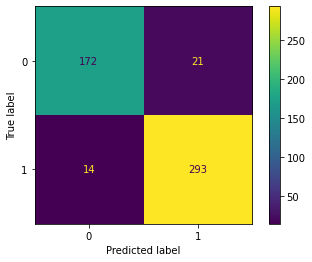

In [26]:
plot_confusion_matrix(log_model,scaled_X_test,y_test);

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


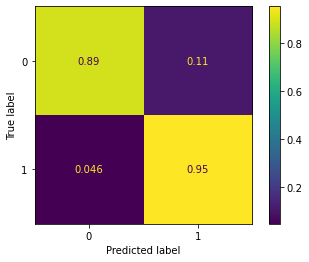

In [27]:
# Scaled so highest value=1
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true')

#### Classification report

This type of report displays many other performance metrics, as well as the amount of data used in the test of the model. The metrics worth mentioning are:

Recall:

$$Recall = \frac{Total_{positive}}{Total_{actual positive}}$$

Precision:
$$Prec = \frac{Total_{positive}}{Total_{predicted positive}}$$


F1-Score:

$$F1 = \frac{2*prec*recall}{prec + recall}$$


An advantage of this metrics is that they don't fall in the accuracy paradox, and get indetermined if there is no negative!



In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



Values of precision and recall close to accuracy, mean that the data set is an unbalanced one

#### Evaluating Curves and AUC (area under the curve)

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


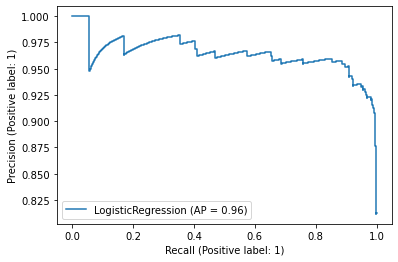

In [29]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

# AP --> 1 perfect Precision Recall

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


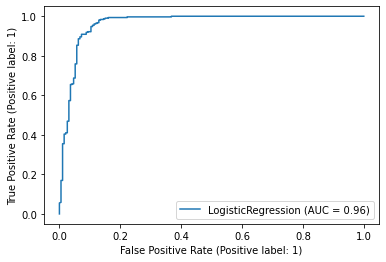

In [30]:
plot_roc_curve(log_model,scaled_X_test,y_test)
# AUC --> 1 indicates a perfect ROC curve